# Plot results
Plot results generated by ```grid_script.py```

In [42]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(os.listdir())
with open("results.json", "r") as file:
    results = json.loads(file.read())

['.git', '.gitignore', '.ipynb_checkpoints', '.vscode', 'erdos_selfridge_spencer', 'ess_gym_env', 'grid_script.py', 'images', 'log.log', 'logs', 'new_log.log', 'new_new_log.log', 'new_results.json', 'plot_results.ipynb', 'quick_start.ipynb', 'README.md', 'requirements.txt', 'results', 'results.json', 'results_old.json', 'source_readme.md', 'spam.log', 'tmp', '_baselines_repo', '_gym_repo']


In [43]:
results.keys(), results['0.0'].keys(), results['0.0']['0.0'].keys()

(dict_keys(['0.0', '0.05', '0.1', '0.15000000000000002', '0.2', '0.25', '0.30000000000000004', '0.35000000000000003', '0.4', '0.45', '0.5', '0.55', '0.6000000000000001', '0.65', '0.7000000000000001', '0.75', '0.8', '0.8500000000000001', '0.9', '0.9500000000000001', '1.0']),
 dict_keys(['0.0', '0.05', '0.1', '0.15000000000000002', '0.2', '0.25', '0.30000000000000004', '0.35000000000000003', '0.4', '0.45', '0.5', '0.55', '0.6000000000000001', '0.65', '0.7000000000000001', '0.75', '0.8', '0.8500000000000001', '0.9', '0.9500000000000001', '1.0']),
 dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

In [44]:
keys = results.keys()
data_1 = np.empty((len(keys), len(keys)))
data_0 = np.empty((len(keys), len(keys)))
for idx_i, key_i in enumerate(keys):
    for idx_j, key_j in enumerate(keys):
        li = list()
        k = len(results[key_i][key_j])
        for i in range(k):
            li.append(results[key_i][key_j][str(i)])
        li = np.array(li).mean(axis=0)
        data_0[idx_i][idx_j] = li[0]
        data_1[idx_i][idx_j] = li[1]

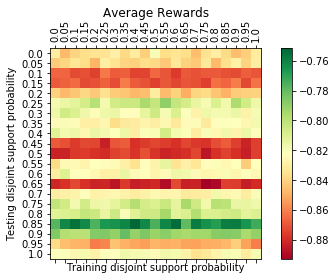

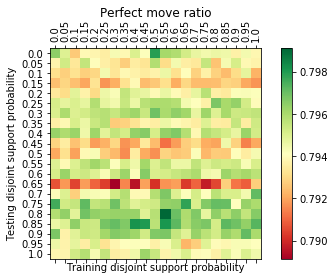

In [45]:
cmap_name = "RdYlGn"

fig = plt.figure()
ax = fig.add_subplot(111, title="Average Rewards\n")
cax = ax.matshow(data_0, interpolation='nearest', cmap=plt.get_cmap(cmap_name))
fig.colorbar(cax)
ax.set_xticks(np.arange(20+1))
ax.set_yticks(np.arange(20+1))
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("Training disjoint support probability")
ax.set_ylabel("Testing disjoint support probability")
ax.set_xticklabels(list(map(lambda x: str(round(x, 2)), np.linspace(0, 1, 20+1))))
ax.set_yticklabels(list(map(lambda x: str(round(x, 2)), np.linspace(0, 1, 20+1))))
plt.tight_layout()
plt.savefig("./images/old_rewards_average.png")
plt.show()
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111, title="Perfect move ratio\n")
cax = ax.matshow(data_1, interpolation='nearest', cmap=plt.get_cmap(cmap_name))
fig.colorbar(cax)
ax.set_xticks(np.arange(20+1))
ax.set_yticks(np.arange(20+1))
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("Training disjoint support probability")
ax.set_ylabel("Testing disjoint support probability")
ax.set_xticklabels(list(map(lambda x: str(round(x, 2)), np.linspace(0, 1, 20+1))))
ax.set_yticklabels(list(map(lambda x: str(round(x, 2)), np.linspace(0, 1, 20+1))))
plt.tight_layout()
plt.savefig("./images/old_moves_ratio.png")
plt.show()
plt.close()